In [1]:
import torch
from torch import nn
from torchvision import datasets, transforms
import sys
sys.path.insert(0, '/Users/mondormo/stackla17/deeplearning2019/deep-learning-v2-pytorch/intro-to-pytorch')
import helper

In [2]:

trainset = datasets.FashionMNIST(
    '~/.pytorch/FashionMNIST_data/',
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.5,0.5,0.5),
            (0.5,0.5,0.5)
        )
    ]),
    download=True,
    train=True
)


trainloader = torch.utils.data.DataLoader(
    trainset,
    shuffle=True,
    batch_size=64
)


testset = datasets.FashionMNIST(
    '~/.pytorch/FashionMNIST_data/',
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(
            (0.5,0.5,0.5),
            (0.5,0.5,0.5)
        )
    ]),
    download=True,
    train=False
)


testloader = torch.utils.data.DataLoader(
    testset,
    shuffle=True,
    batch_size=64
)

torch.Size([64, 1, 28, 28])


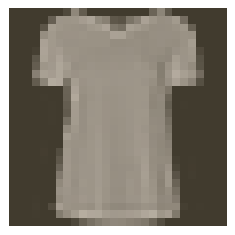

In [3]:
images, labels = next(iter(trainloader))
print(images.shape)
helper.imshow(images[0, :])

In [4]:
import torch.nn.functional as F
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.w1 = nn.Linear(784, 256)
        self.w2 = nn.Linear(256, 128)        
        self.w3 = nn.Linear(128, 64)
        self.w4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(p=0.2)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.dropout(F.relu(self.w1(x)))
        x = self.dropout(F.relu(self.w2(x)))
        x = self.dropout(F.relu(self.w3(x)))
        return F.log_softmax(self.w4(x), dim=1)
    
        

In [5]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [8]:
epochs = 20

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        

    running_loss = running_loss/len(trainloader)
    train_losses.append(running_loss)
    
    test_loss = 0
    accuracy = 0

    with torch.no_grad():
        model.eval()
        for images, labels in testloader:
            log_ps = model(images)
            test_loss += criterion(log_ps, labels)

            ps = torch.exp(log_ps)
            top_p, top_class = ps.topk(1, dim=1)
            equals = top_class == labels.view(*top_class.shape)
            accuracy += torch.mean(equals.type(torch.FloatTensor))
    model.train()
          
    
    accuracy = accuracy/len(testloader)
    test_loss = test_loss/len(testloader)
    test_losses.append(test_loss)
    
    print('Epoch %s' % (e))
    print('Train loss {:.3f}'.format(running_loss))
    print('Test loss {:.3f}'.format(test_loss))
    print('Accuracy {:.3f}'.format(accuracy))
                
                
                
        
        

Epoch 0
Train loss 0.359
Test loss 0.385
Accuracy 0.871
Epoch 1
Train loss 0.267
Test loss 0.380
Accuracy 0.874


KeyboardInterrupt: 

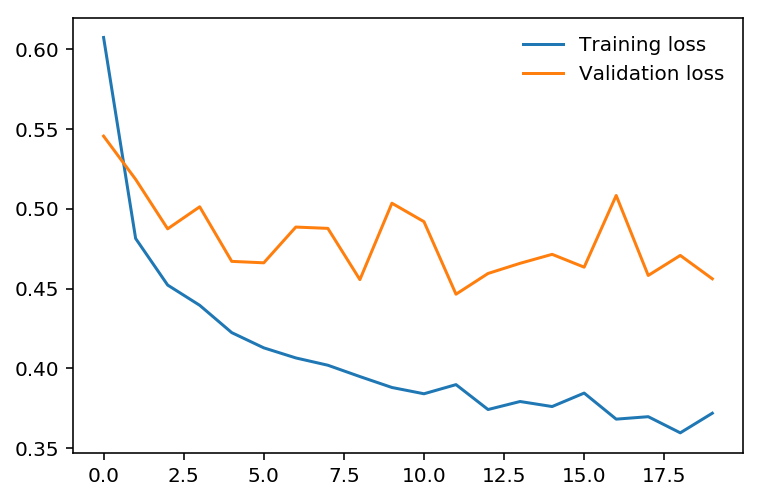

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)